In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

In [2]:
n = str(1) #chiller number
df = pd.read_csv("data/Chiller"+n+"_full.csv")
df.index = pd.to_datetime(df['ts'])
df.drop('ts', axis=1, inplace=True)
df.head()

,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed
ts,,,,,,,,,,,
2017-05-01 00:00:00,349.0,0.0,353.0,18.068238,20.535583,23.376769,23.387453,0.000000,0.000000,0.000000,0.00000
2017-05-01 00:01:00,383.0,0.0,396.0,16.166991,16.914672,22.565002,22.639772,35.284023,0.303604,0.000000,0.00000
2017-05-01 00:02:00,379.0,0.0,394.0,15.964052,16.722413,22.372743,22.351379,144.330154,1.241898,0.000000,0.00000
2017-05-01 00:03:00,389.0,0.0,408.0,17.053528,17.822570,22.265932,22.372743,195.770782,1.684522,10.812524,0.16108
2017-05-01 00:04:00,5748.0,4480.0,4942.0,18.559570,19.531554,22.415465,22.490235,214.631348,1.846809,77.101921,1.14863


In [3]:
df['deltaT12'] = df['value2']-df['value1']
df['totalWatt'] = df.apply(lambda row: row['ch1Watt']+row['ch2Watt']+row['ch3Watt'], axis=1)
df.drop(['ch1Watt', 'ch2Watt', 'ch3Watt'], inplace=True, axis=1)
df=df[['value1','value2','value3','value4','conflowRate','conflowSpeed','evaflowRate','evaflowSpeed','deltaT12','totalWatt']]
df.head()

,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed,deltaT12,totalWatt
ts,,,,,,,,,,
2017-05-01 00:00:00,18.068238,20.535583,23.376769,23.387453,0.000000,0.000000,0.000000,0.00000,2.467346,702.0
2017-05-01 00:01:00,16.166991,16.914672,22.565002,22.639772,35.284023,0.303604,0.000000,0.00000,0.747681,779.0
2017-05-01 00:02:00,15.964052,16.722413,22.372743,22.351379,144.330154,1.241898,0.000000,0.00000,0.758361,773.0
2017-05-01 00:03:00,17.053528,17.822570,22.265932,22.372743,195.770782,1.684522,10.812524,0.16108,0.769042,797.0
2017-05-01 00:04:00,18.559570,19.531554,22.415465,22.490235,214.631348,1.846809,77.101921,1.14863,0.971984,15170.0


In [4]:
df['H']=df['deltaT12']*df['evaflowRate']
df.head()

,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed,deltaT12,totalWatt,H
ts,,,,,,,,,,,
2017-05-01 00:00:00,18.068238,20.535583,23.376769,23.387453,0.000000,0.000000,0.000000,0.00000,2.467346,702.0,0.000000
2017-05-01 00:01:00,16.166991,16.914672,22.565002,22.639772,35.284023,0.303604,0.000000,0.00000,0.747681,779.0,0.000000
2017-05-01 00:02:00,15.964052,16.722413,22.372743,22.351379,144.330154,1.241898,0.000000,0.00000,0.758361,773.0,0.000000
2017-05-01 00:03:00,17.053528,17.822570,22.265932,22.372743,195.770782,1.684522,10.812524,0.16108,0.769042,797.0,8.315282
2017-05-01 00:04:00,18.559570,19.531554,22.415465,22.490235,214.631348,1.846809,77.101921,1.14863,0.971984,15170.0,74.941855


In [5]:
df[['value1', 'evaflowRate', 'deltaT12','H','totalWatt']].describe()

,value1,evaflowRate,deltaT12,H,totalWatt
count,258731.000000,258731.000000,258731.000000,258731.000000,258731.000000
mean,13.454318,40.321105,4.037717,99.416837,24990.240839
std,3.427558,82.491036,3.614330,240.321854,58619.205854
min,0.000000,0.000000,-38.206486,-129.271799,203.000000
25%,10.997316,0.000000,1.196288,0.000000,693.000000
50%,12.973329,0.000000,3.257752,0.000000,703.000000
75%,16.444704,14.330884,6.579590,0.000000,717.000000
max,69.989324,233.577560,53.939825,1131.655275,227587.000000


In [6]:
X = df[(df['evaflowRate']>125)&(df['totalWatt']>20000)][['value1', 'evaflowRate', 'deltaT12','H']].as_matrix()
y = df[(df['evaflowRate']>125)&(df['totalWatt']>20000)][['totalWatt']].as_matrix().sum(axis=1)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)

from sklearn.preprocessing import StandardScaler,RobustScaler
#scaler = StandardScaler()
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
X_full = scaler.transform(X)

In [102]:
from sklearn.neural_network import MLPRegressor
#n_layer=int(np.ceil(X_train.shape[0]/(5*X_train.shape[1])))
n_layer=200
regr = MLPRegressor(hidden_layer_sizes=(n_layer,n_layer,n_layer,),
                    max_iter=5000, verbose=True, random_state=0, alpha=0.0001, 
                    learning_rate_init=0.001,epsilon=1e-12, tol=0.0001)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_full)
y_pred_test = regr.predict(X_test)

Iteration 1, loss = 10537479775.54167747
Iteration 2, loss = 1819181964.21696448
Iteration 3, loss = 441023785.62635678
Iteration 4, loss = 227428582.01534700
Iteration 5, loss = 188679166.33631924
Iteration 6, loss = 178338176.85522524
Iteration 7, loss = 173762374.77222151
Iteration 8, loss = 171138810.49437368
Iteration 9, loss = 168585678.88450959
Iteration 10, loss = 166088520.53813794
Iteration 11, loss = 163566057.69309604
Iteration 12, loss = 160671345.32787859
Iteration 13, loss = 157848393.19286922
Iteration 14, loss = 154120887.66109121
Iteration 15, loss = 150490667.01690346
Iteration 16, loss = 146212259.50026968
Iteration 17, loss = 141994354.53041711
Iteration 18, loss = 137761800.26270294
Iteration 19, loss = 133797633.25695027
Iteration 20, loss = 129562797.67178495
Iteration 21, loss = 126529810.26480037
Iteration 22, loss = 123006860.06026556
Iteration 23, loss = 120398974.56417297
Iteration 24, loss = 117747440.28900477
Iteration 25, loss = 115258932.26858388
Iterat

In [103]:
y_df = pd.DataFrame(np.concatenate((y.reshape((y.shape[0],1)), y_pred.reshape((y_pred.shape[0],1))), axis=1))
y_df.columns=['y_true', 'y_pred']
#y_df.plot(title='Randomized train and test set')

In [104]:
y_test_df = pd.DataFrame(np.concatenate((y_test.reshape((y_test.shape[0],1)), y_pred_test.reshape((y_pred_test.shape[0],1))), axis=1))
y_test_df.columns=['y_true', 'y_pred']
#y_test_df.plot(title='Test set')

In [105]:
from sklearn.metrics import mean_absolute_error as mae
print(mae(y_test, y_pred_test))
y_test_df['absolute error'] = abs(y_test_df['y_true'] - y_test_df['y_pred'])
y_test_df['relative error'] = abs(y_test_df['y_true'] - y_test_df['y_pred'])/y_test_df['y_true']
y_test_df.describe()

7474.27739539


,y_true,y_pred,absolute error,relative error
count,4275.000000,4275.000000,4275.000000,4275.000000
mean,148898.052398,148820.582379,7474.277395,0.057414
std,52196.992919,50756.831092,9606.180590,0.077191
min,27182.000000,25151.875489,3.478204,0.000029
25%,107975.000000,111394.973324,1903.480981,0.013571
50%,176006.000000,171160.039453,4385.539563,0.032194
75%,191049.500000,188685.098703,8958.281811,0.073287
max,226253.000000,224188.553936,132491.735289,1.077597


In [106]:
T1_min=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['min'])[0]
T1_max=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['max'])[0]
F_min=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['min'])[1]
F_max=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate']].describe().loc['max'])[1]
H_mean=np.array(df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['H']].describe().loc['mean'])[0]
#df[(df['evaflowRate']>125)&(df['totalWatt']>25000)][['value1', 'evaflowRate','H']].describe()

In [107]:
T1=np.arange(np.floor(T1_min), np.ceil(T1_max)+5, 0.5)
F=np.arange(175, np.ceil(F_max), 0.5) #np.floor(F_min)

In [117]:
#H is just deltaT12*F because optimizing ignores constants
H=800
def COP(H,T1,F_full):
    n = len(T1)
    m = len(F_full)
    P_full=np.zeros((n,m))
    i=0
    for F in F_full:
        X=np.array([T1,F*np.ones(n),(H/F)*np.ones(n),H*np.ones(n)]).T
        P = regr.predict(scaler.transform(X))
        P_full[:,i]=P
        i+=1
    assert(P_full.shape == (n,m))
    return H/P_full*4.19/3.6*1000,P_full
COP_T,P_T = COP(H,T1,F)

<IPython.core.display.Javascript object>


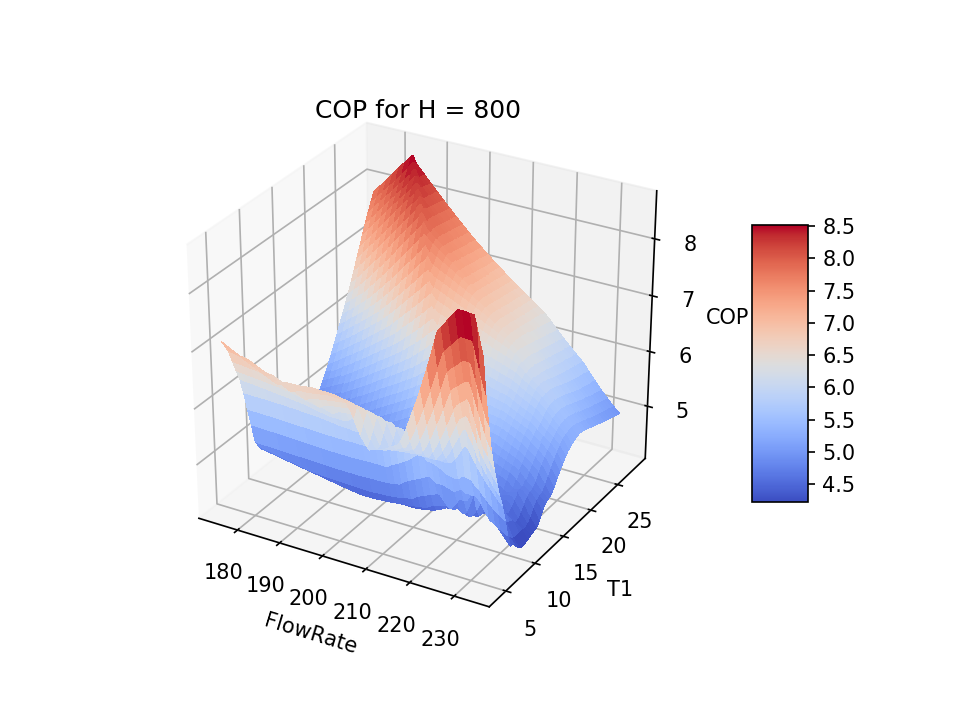

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
F_full=np.ones((len(T1),1)).dot(F.reshape(1,len(F)))
T1_full=np.ones((len(F),1)).dot(T1.reshape(1,len(T1))).T
surf=ax.plot_surface(F_full, T1_full, COP_T,cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf,shrink=0.5, aspect=5)
#surf=ax.plot_wireframe(F_full, T1_full, COP_T)
ax.set_xlabel('FlowRate')
ax.set_ylabel('T1')
ax.set_zlabel('COP')
ax.set_title('COP for H = '+str(H))

TypeError: 'str' object is not callable

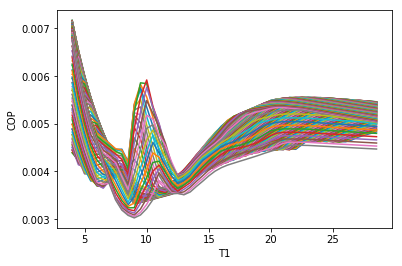

In [284]:
plt.plot(T1,COP_T)
plt.xlabel('T1')
plt.ylabel('COP')
plt.title('COP vs T1 for H = '+str(H)+' and F = '+str(F[0])+' to F = '+str(F[-1]))

In [285]:
plt.title('COP vs F for H = '+str(H)+' and T1 = '+str(T1[0])+' to T1 = '+str(T1[-1]))
plt.plot(F,COP_T.T)
plt.xlabel('F')
plt.ylabel('COP')

TypeError: 'str' object is not callable

In [168]:
#100,100,100: 68163886.94090495,7434.29141922
#200,200,200: 66024496.13697716,7195.521646
#300,300,300: 70120189.58196577,7490.62158718
#400,400,400: 66318930.86602330,7428.63799163

In [12]:
pd.DataFrame(regr.coefs_[0].T).describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,-0.145959,-0.006321,0.152002,0.057186
std,0.751389,0.505253,0.294356,0.310677
min,-4.347312,-2.121079,-1.946765,-1.996148
25%,-0.086872,-0.075844,-0.003942,-0.117839
50%,-0.059174,-0.034094,0.142225,0.019024
75%,-0.011405,0.054227,0.296269,0.223920
max,1.735173,1.849093,0.976616,0.983919
